In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
np.random.seed(0)

In [3]:
n_pts = 500

X,y = make_circles(n_samples=n_pts, random_state=123, noise=0.16, factor=0.1)

random_state denotes to any random integer to seed the same points

noise means how mixed the data is

factor means the size of inner vs outer circle. 0.2 means inner circle diameter is 20% smaller than outer circle.

In [4]:
X[0:5]

array([[ 0.59933176, -0.30308945],
       [-0.27040988,  0.12611932],
       [-0.20760384,  0.20036359],
       [ 0.10148922, -0.22617084],
       [-0.2915308 ,  0.20999457]])

In [5]:
y[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

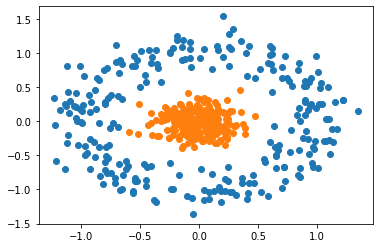

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1]) # outer circle
plt.scatter(X[y==1, 0], X[y==1, 1]) # inner circle

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [8]:
model = Sequential()
# hidden layer of 4 nodes with 2 node input layer and sigmoid activation functions
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))

# output layer of 1 node
model.add(Dense(1, activation='sigmoid'))

model.compile(Adam(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [9]:
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=100, shuffle='true')

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.5280
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5120
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4980
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5200
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.6360
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.6040
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4140
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.6260
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.6920
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.4300
Epoch 11/

10/10 [==============================] - 0s 4ms/step - loss: 0.1064 - accuracy: 0.9960
Epoch 84/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1042 - accuracy: 0.9960
Epoch 85/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.9960
Epoch 86/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0999 - accuracy: 0.9960
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0979 - accuracy: 0.9960
Epoch 88/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0960 - accuracy: 0.9960
Epoch 89/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0941 - accuracy: 0.9960
Epoch 90/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0923 - accuracy: 0.9980
Epoch 91/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9980
Epoch 92/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0889 - accuracy: 0.9980
Epoch 93/100


Text(0.5, 1.0, 'accuracy')

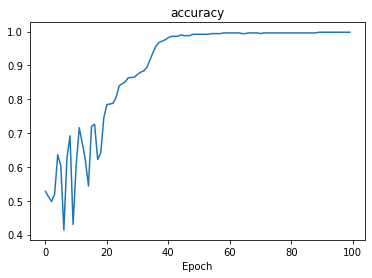

In [10]:
plt.plot(h.history['accuracy'])
plt.xlabel('Epoch')
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

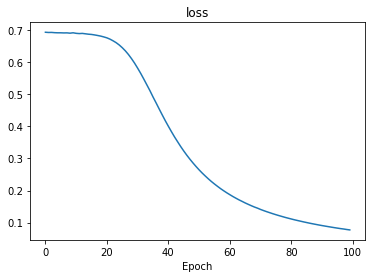

In [11]:
plt.plot(h.history['loss'])
plt.xlabel('Epoch')
plt.title('loss')

#### Decision Boundary

79/79 [==============================] - 0s 2ms/step


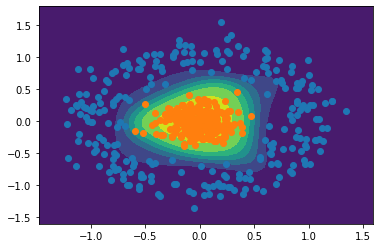

In [12]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

#### Prediction

1/1 [==============================] - 0s 38ms/step
Prediction is:  [[0.19088678]]


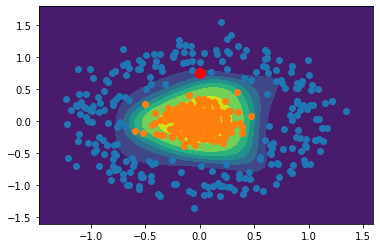

In [13]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

x = 0
y = 0.75

point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)

### Neural Network visualization from tensorflow playground

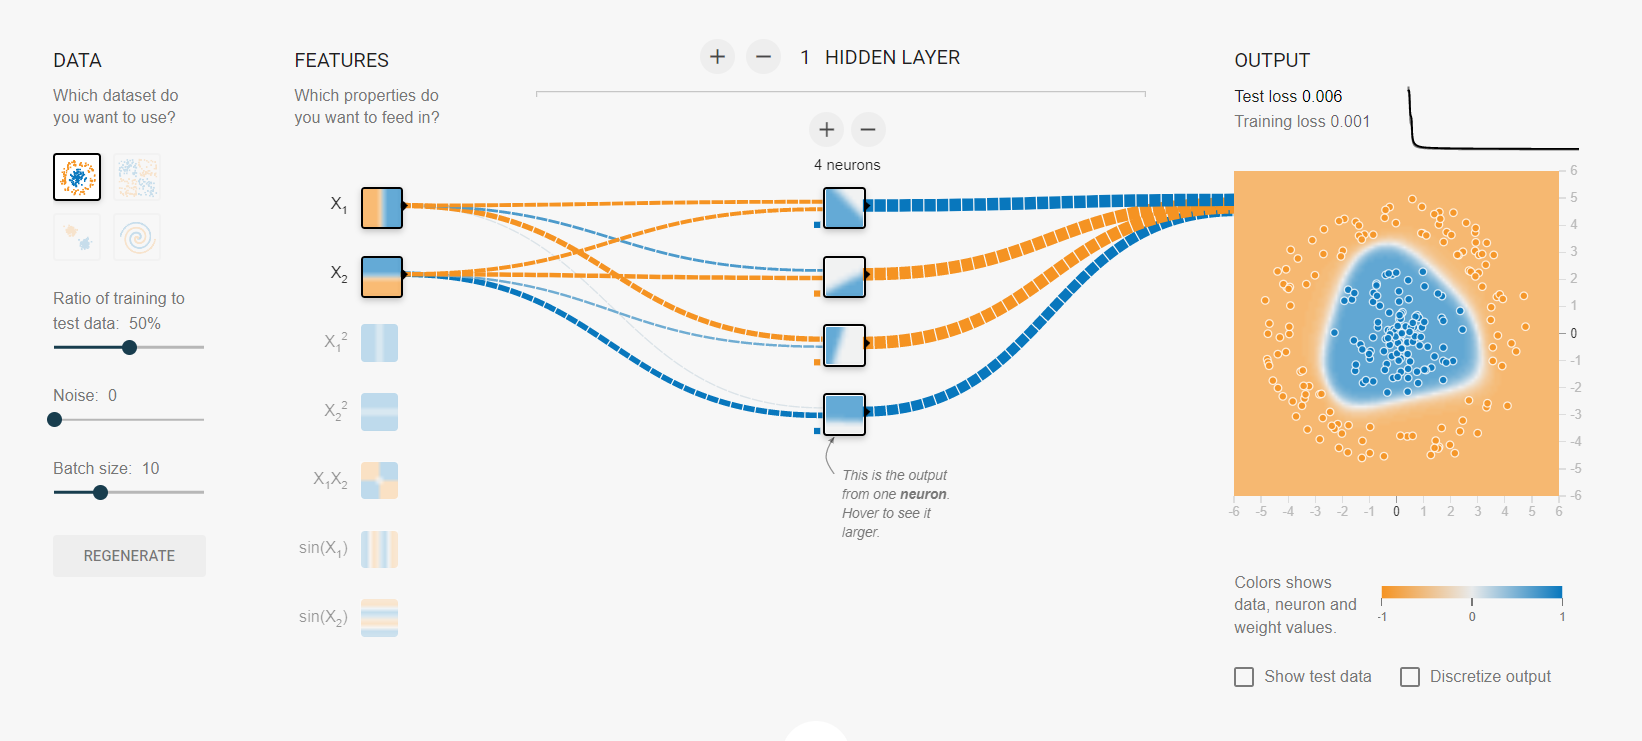

### Neural Networks architecture Explanation

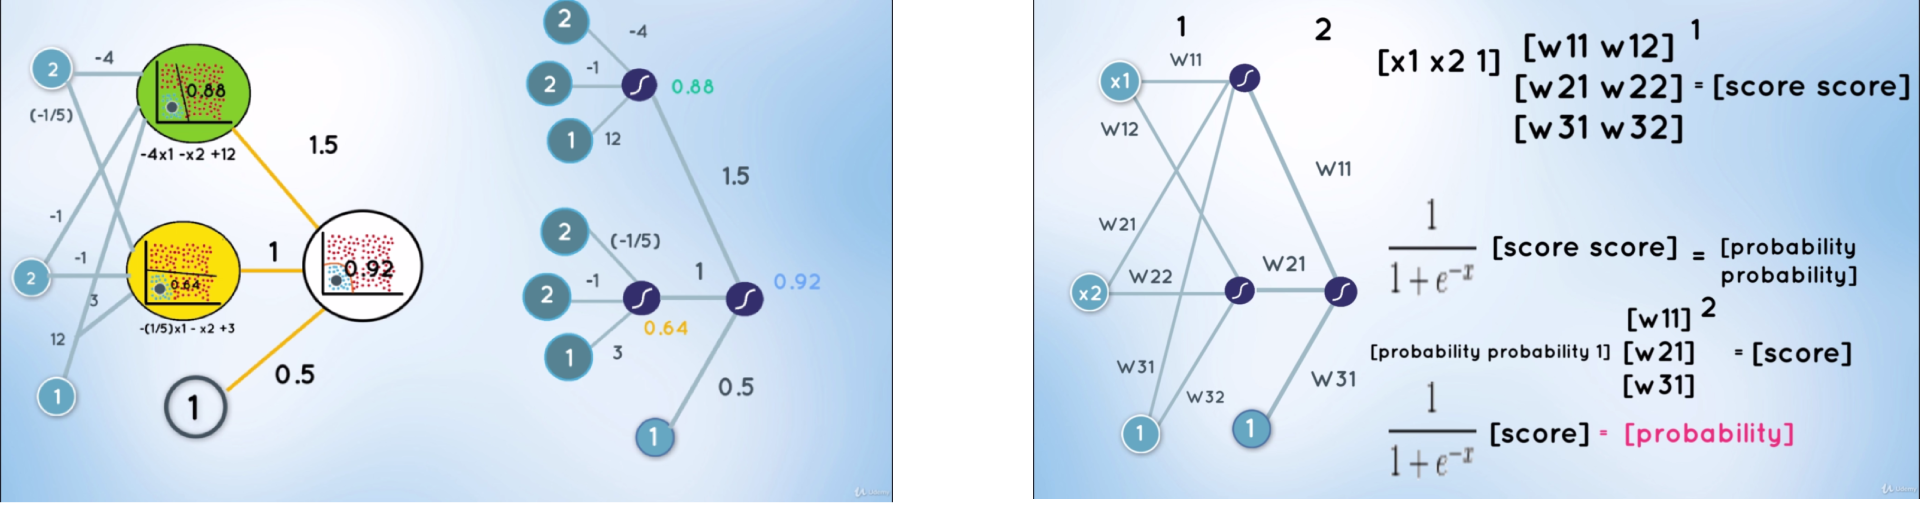